# Session 7: Introduction to ML - Classification

## Demo 1: Classification on Toy Dataset

Classification using the Breast Cancer Dataset from scikit-learn (https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset)

In [7]:
import sklearn
from sklearn import *
sklearn.__version__

'0.21.2'

In [8]:
# Load dataset
data = sklearn.datasets.load_breast_cancer()
X = data.data
y = data.target

In [ ]:
# Split into training and testing data (72/25 by default)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)

### 1. Logistic regression model

In [9]:

# Split into training and testing data (72/25 by default)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)

# Run Logistic regression
logreg = sklearn.linear_model.LogisticRegression().fit(X_train, y_train)

# Print the results
print("Logistic Regression: Training accuracy: {:.3f}".format(logreg.score(X_train, y_train)))
print("Logistic Regression: Testing accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

Logistic Regression: Training accuracy: 0.960
Logistic Regression: Testing accuracy: 0.958


C:\Users\patax\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 2. Decision tree model

In [10]:
# Run decision tree
tree = sklearn.tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print("Decision Tree: Training accuracy: {:.3f}".format(tree.score(X_train, y_train)))
print("Decision Tree: Testing accuracy: {:.3f}".format(tree.score(X_test, y_test)))

Decision Tree: Training accuracy: 1.000
Decision Tree: Testing accuracy: 0.881


### 3. Evaluation - calculate precision and recall

Calculate precision and recall for the model recently fitted (either logistic regression or decision tree, whatever executed last)

In [11]:
# calculate precision and recall

y_predict = logreg.predict(X_test)
print("Precision score: {:.3f}".format(sklearn.metrics.precision_score(y_test, y_predict)))
print("Recall score: {:.3f}".format(sklearn.metrics.recall_score(y_test, y_predict)))

Precision score: 0.988
Recall score: 0.944


Plot precision-recall curve (see https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)

Text(0.5, 1.0, 'Average precision score: AP=1.00')

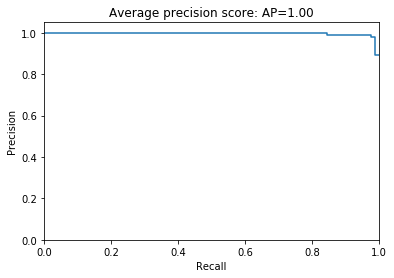

In [12]:
import matplotlib.pyplot as plt

y_prob = logreg.decision_function(X_test)
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test, y_prob)

plt.figure()
plt.step(recall, precision)
average_precision = sklearn.metrics.average_precision_score(y_test, y_prob)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score: AP={0:0.2f}'.format(average_precision))